# Iris flowers

## 1. Setup and basic checks

### 1.1. Library version check

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
scipy: 0.19.0
numpy: 1.13.3
matplotlib: 2.0.2
pandas: 0.20.1
sklearn: 0.18.1


### 1.2. Load libraries

In [2]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### 1.3. Custom options
The following section will contain options (such as matplotlib axes color, etc.)

In [3]:
# ~~~~~matplotlib~~~~~
# list matplotlib's available styles
print(plt.style.available)
# pick a light one
plt.style.use('classic')
# ~~~~~~~~~~~~~~~~~~~~

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn', u'seaborn-poster', u'seaborn-bright', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


## 2. Load Dataset

We can load the data directly from the UCI Machine Learning repository.

We are using `pandas` to load the data. We will also use `pandas` next to explore the data both with descriptive statistics and data visualization.

<div class="alert alert-block alert-info">
We are specifying the names of each column when loading the data. This will help later when we explore the data.
</div>


In [4]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

## 3. Summarize the dataset
Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:

1. **Dimensions** of the dataset.
2. **Peek** at the data itself.
3. Statistical **summary** of all attributes.
4. **Breakdown** of the data by the class variable.

### 3.1. Dimensions of the dataset

We can access the `shape` attribute of the `dataset` object to get a quick idea of how many instances (rows) and attributes (columns) it contains.

In [5]:
# get an idea of the shape of the dataset
print(dataset.shape)

(150, 5)


### 3.2. Peek at the data
It is also a good idea to eyeball your data. You can accomplish that accessing the `head()` method of the `dataset` object:

In [6]:
# head: print the first 20 rows
print(dataset.head(20))

# tail: print the last row
print(dataset.tail(1))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

### 3.3. Statistical summary
Now we can take a look at some descriptive statistics of each attribute. This includes the count, mean, min and, max values, as well as some percentiles.

We will accomplish that using the `describe()` method of the `dataset` object.

In [7]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 3.4. Class distribution
Let's now take a look at the number of instances that belong to each class

In [8]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 4. Data visualization
Now that we have a basic idea of the data, we shall extend it with some visualizations.

We are going to look at two types of plots:

- **Univariate** plots to better understand *each* attribute.
- **Multivariate** plots to better understand the *relationships* between attributes.

### 4.1. Univariate plots

#### Box and whisker plots

Given that the input variables are numeric, we can create box and whisker plots of each of them. This will give us a much clearer idea of the distribution of the input attributes:

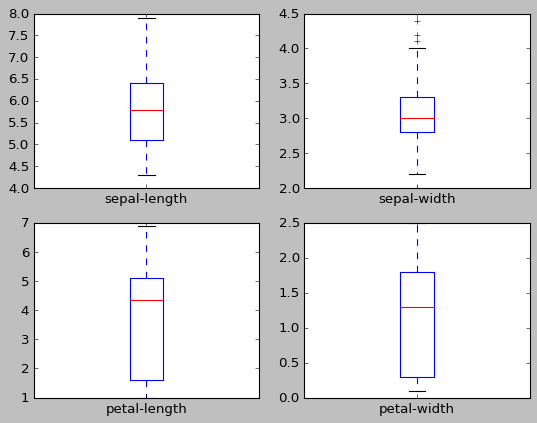

In [9]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

#### Histograms
We can also create a histogram of each input variable to get a better idea of their distribution.

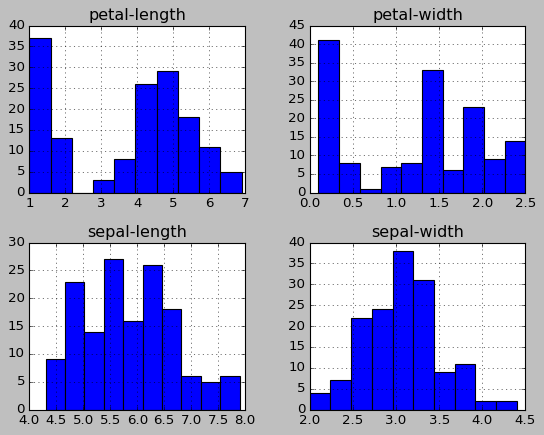

In [10]:
# histogram
dataset.hist()
plt.show()

<div class="alert alert-block alert-info">
It looks like perhaps two of the input variables (namely, `sepal-length` and `sepal-width`) have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.
</div>

### 4.2. Multivariate plots
Now we can look at the **interactions** between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot **structured relationships** between input variables.

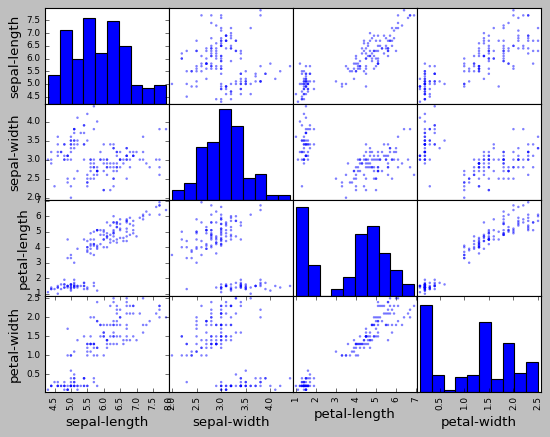

In [11]:
# scatterplot matrix
scatter_matrix(dataset)
plt.show()

It seems that the following variables may be correlated:

| Variable X    | Variable Y    | Correlation intensity  |
| ------------- | ------------- | ---------------------- |
| sepal-length  | petal-length  | strong                 |
| sepal-length  | petal-width   | moderate (?)           |
| petal-length  | petal-width   | strong                 |


## 5. Evaluating algorithms
Now it is time to create some models of the data and estimate their **accuracy** on *unseen* data.

Here is what we are going to cover in this step:

1. Separate out a validation dataset
2. Set-up the test harness to use 10-fold cross validation
3. Build 5 different models to predict species (*class*) from flower measurements
4. Select the best model

### 5.1. Creating a validation dataset
In order to determine the accuracy of the models, they will be tested on *unseen* data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two:
- 80% of the instances, which we will use to **train** our models
- The remaining 20% will be kept as a **validation** (i.e. *unseen*) dataset.

In [12]:
# Split validation dataset (2D array)
array = dataset.values
# X = get attributes 0 through 3
X = array[:,0:4]
# Y = get 4th attribute (class)
Y = array[:,4]

# set test parameters (validation_size and seed)
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In this previous step, we kept training data in `X_train` and `Y_train` variables to prepare the models, while validation data is stored separately in the `X_validation` and `Y_validation` variables. 

### 5.2. Test harness
We will be using 10-fold cross validation to estimate the accuracy of the models.

This will do the following:
- Split the dataset into 10 parts
- Train on 9 of those parts
- Test on the remaining 1 part
- Repeat for all combinations of train-test splits

In [13]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

We are using the `'accuracy'` metric to evaluate the models. This is essentially a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset, represented as a percentage. We will be using the `scoring` variable whenever we run, build and evaluate a model.

### 5.3. Build models
We don't know which algorithms might be good for this particular problem, nor what configurations to use. From the plots, we can infer that some of the classes might be linearly separable in some dimensions, so we are expecting generally good results.

For this particular problem, we will evaluate 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

This is a good mixture of simple linear (LR and LDA) and, non-linear (KNN, CART, NB and SVM) algorithms. We will reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using *exactly* the same data splits. It ensures the results are *directly* comparable.

Now it is time to build and evaluate the models:

In [22]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
for (name, model) in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print msg

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


### 5.4. Select the best model
We now have 6 models with their respective accuracy estimates. We need to compare the obtained results and select the most accurate model. According to the raw results of the code above, KNN has the largest accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each one was evaluated 10 times (10-fold cross validation).

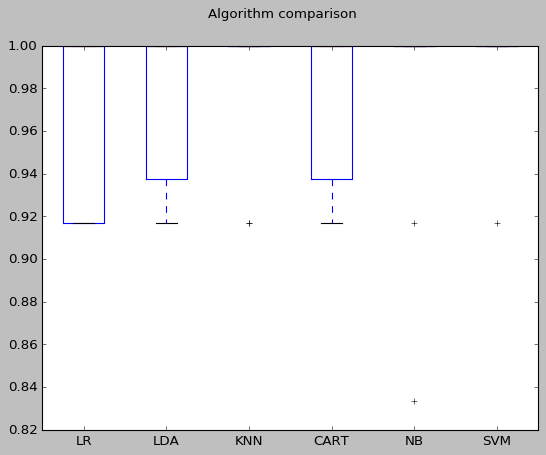

In [24]:
# Compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()